In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
data=pd.read_csv(r'/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv',encoding='ISO-8859-1')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [4]:
data['order date']= pd.to_datetime(data['order date (DateOrders)'])
data['shipping date']= pd.to_datetime(data['shipping date (DateOrders)'])

In [5]:
data['order year']=data['order date'].dt.year
data['order month']=data['order date'].dt.month
data['order day']=data['order date'].dt.day
data['order hour']=data['order date'].dt.hour
data['order minute']=data['order date'].dt.minute

data['shipping year']=data['shipping date'].dt.year
data['shipping month']=data['shipping date'].dt.month
data['shipping day']=data['shipping date'].dt.day
data['shipping hour']=data['shipping date'].dt.hour
data['shipping minute']=data['shipping date'].dt.minute

In [6]:
data_n=data.loc[:,['Type','Days for shipment (scheduled)','order year','order month','order day','order hour','order minute','Benefit per order','Category Name','Latitude','Longitude','Customer Segment','Department Name','Market','Order City','Order Country','Order Item Discount','Order Item Product Price','Order Item Quantity','Order Item Total','Order State','Product Name','shipping year','shipping month','shipping day','shipping hour','shipping minute','Shipping Mode','Late_delivery_risk','Order Status']]
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   order year                     180519 non-null  int32  
 3   order month                    180519 non-null  int32  
 4   order day                      180519 non-null  int32  
 5   order hour                     180519 non-null  int32  
 6   order minute                   180519 non-null  int32  
 7   Benefit per order              180519 non-null  float64
 8   Category Name                  180519 non-null  object 
 9   Latitude                       180519 non-null  float64
 10  Longitude                      180519 non-null  float64
 11  Customer Segment               180519 non-null  object 
 12  Department Name               

In [7]:
for i in data_n.columns:
    if data_n[i].dtype=='object':
        print(i,len(data_n[i].unique()))

Type 4
Category Name 50
Customer Segment 3
Department Name 11
Market 5
Order City 3597
Order Country 164
Order State 1089
Product Name 118
Shipping Mode 4
Order Status 9


In [8]:
data_n['Order Status'].value_counts()

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

In [9]:
data_n['Order Status']= [0 if i!='SUSPECTED_FRAUD' else 1 for i in data_n['Order Status']]
data_n['Order Status'].unique()

array([0, 1])

In [10]:
enc=LabelEncoder()
for i in data_n.columns:
    if data_n[i].dtype=='object':
        data_n[i]=enc.fit_transform(data_n[i])
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   order year                     180519 non-null  int32  
 3   order month                    180519 non-null  int32  
 4   order day                      180519 non-null  int32  
 5   order hour                     180519 non-null  int32  
 6   order minute                   180519 non-null  int32  
 7   Benefit per order              180519 non-null  float64
 8   Category Name                  180519 non-null  int64  
 9   Latitude                       180519 non-null  float64
 10  Longitude                      180519 non-null  float64
 11  Customer Segment               180519 non-null  int64  
 12  Department Name               

In [24]:
print(c['Order Status'])

Type                             0.202094
Days for shipment (scheduled)   -0.002532
order year                       0.003341
order month                     -0.002836
order day                       -0.003325
order hour                       0.001237
order minute                    -0.006578
Benefit per order               -0.001476
Category Name                   -0.002104
Latitude                        -0.003907
Longitude                        0.005481
Customer Segment                -0.005935
Department Name                 -0.000837
Market                          -0.000293
Order City                      -0.005889
Order Country                   -0.004928
Order Item Discount              0.000863
Order Item Product Price         0.000423
Order Item Quantity             -0.000757
Order Item Total                -0.000713
Order State                     -0.006105
Product Name                    -0.000741
shipping year                    0.003352
shipping month                  -0

In [11]:
c=data_n.corr()
print(c['Late_delivery_risk'])

Type                            -0.061529
Days for shipment (scheduled)   -0.369352
order year                      -0.002181
order month                      0.002587
order day                       -0.002028
order hour                       0.047046
order minute                     0.000427
Benefit per order               -0.003727
Category Name                   -0.001361
Latitude                         0.000679
Longitude                       -0.001915
Customer Segment                 0.001419
Department Name                  0.002356
Market                          -0.000578
Order City                       0.003838
Order Country                   -0.001649
Order Item Discount             -0.000750
Order Item Product Price        -0.002175
Order Item Quantity             -0.000139
Order Item Total                -0.003791
Order State                      0.001223
Product Name                     0.003992
shipping year                   -0.000448
shipping month                   0

In [14]:
y1=data_n['Late_delivery_risk']
y2=data_n['Order Status']
x=data_n.drop(['Late_delivery_risk','Order Status'],axis=1)
x=StandardScaler().fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train1,y_test1,y_train2,y_test2= train_test_split(x,y1,y2,stratify=y1,test_size=0.2)

In [16]:
!pip install AutoLogging_ML

In [17]:
from AutoLogging_ML import AutoLogger
a,mode1=AutoLogger.train_and_log_classification(x_train,y_train1,x_test,y_test1,size='large')

/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [18]:
a

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
0,naive bayes,68.965828,70.692495,70.094192,68.890697,"[[53347, 11887], [32931, 46250]]",69.366275,71.098845,70.495193,69.293305,"[[13402, 2906], [8154, 11642]]",precision recall f1-score ...,precision recall f1-score ...
3,adaboost,71.784094,74.521174,73.206981,71.617413,"[[57367, 7867], [32881, 46300]]",72.280080,75.073076,73.714121,72.113790,"[[14442, 1866], [8142, 11654]]",precision recall f1-score ...,precision recall f1-score ...
6,logistic regression,78.829761,79.669366,79.615392,78.829340,"[[57243, 7991], [22582, 56599]]",79.384556,80.227205,80.174335,79.384176,"[[14408, 1900], [5543, 14253]]",precision recall f1-score ...,precision recall f1-score ...
4,gradient boost,87.698646,87.587770,87.573315,87.580457,"[[56281, 8953], [8812, 70369]]",87.940394,87.824859,87.830558,87.827695,"[[14138, 2170], [2184, 17612]]",precision recall f1-score ...,precision recall f1-score ...
10,quadratic discriminant analysis,89.853547,89.887966,90.261664,89.833039,"[[61638, 3596], [11057, 68124]]",89.931864,89.969022,90.343461,89.911727,"[[15428, 880], [2755, 17041]]",precision recall f1-score ...,precision recall f1-score ...
1,decision tree,100.000000,100.000000,100.000000,100.000000,"[[65234, 0], [0, 79181]]",94.571239,94.536467,94.500104,94.517877,"[[15291, 1017], [943, 18853]]",precision recall f1-score ...,precision recall f1-score ...
2,random forest,100.000000,100.000000,100.000000,100.000000,"[[65234, 0], [0, 79181]]",94.770663,94.646012,94.872115,94.735994,"[[15643, 665], [1223, 18573]]",precision recall f1-score ...,precision recall f1-score ...
8,extra trees classifier,100.000000,100.000000,100.000000,100.000000,"[[65234, 0], [0, 79181]]",95.668070,95.544059,95.793644,95.640484,"[[15834, 474], [1090, 18706]]",precision recall f1-score ...,precision recall f1-score ...
9,linear discriminant analysis,96.331406,96.574453,96.081531,96.279009,"[[60990, 4244], [1054, 78127]]",96.454686,96.696750,96.207899,96.404201,"[[15273, 1035], [245, 19551]]",precision recall f1-score ...,precision recall f1-score ...
7,bagging classifier,99.945989,99.943202,99.947776,99.945483,"[[65212, 22], [56, 79125]]",97.545978,97.460555,97.608753,97.526913,"[[16024, 284], [602, 19194]]",precision recall f1-score ...,precision recall f1-score ...


In [20]:
mode1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

naive bayes
adaboost
logistic regression
gradient boost
quadratic discriminant analysis
decision tree
random forest
extra trees classifier
linear discriminant analysis
bagging classifier
xgboost


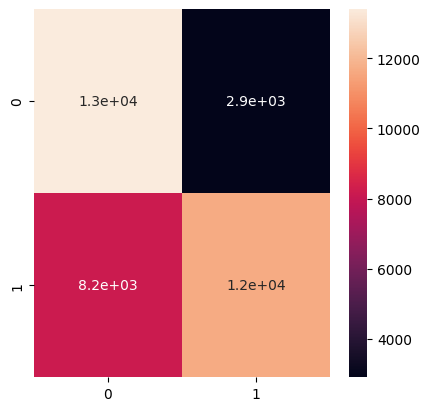

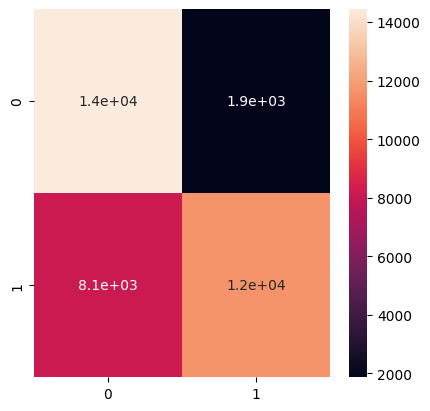

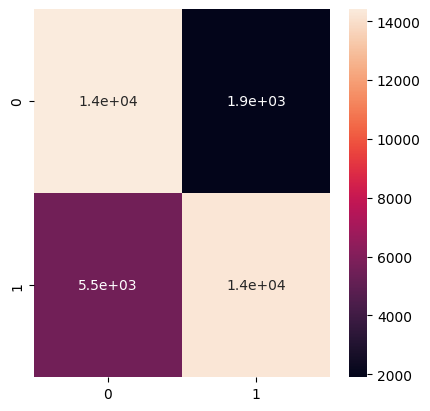

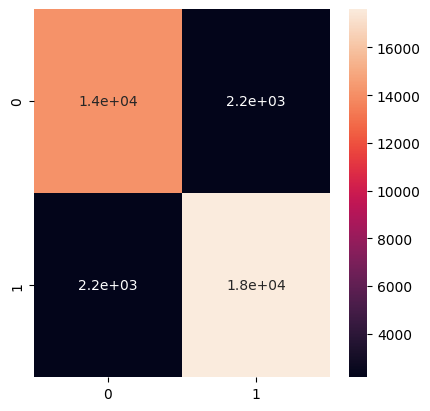

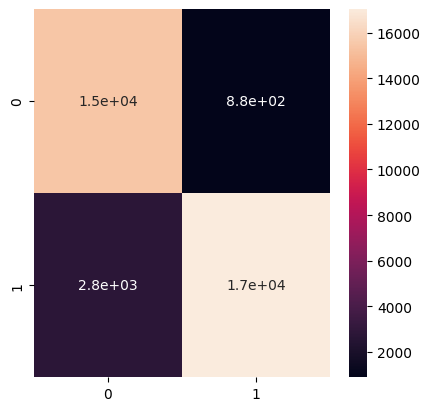

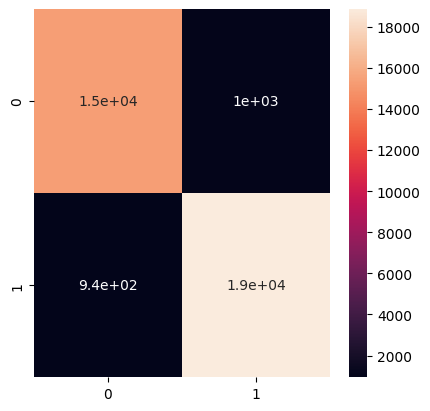

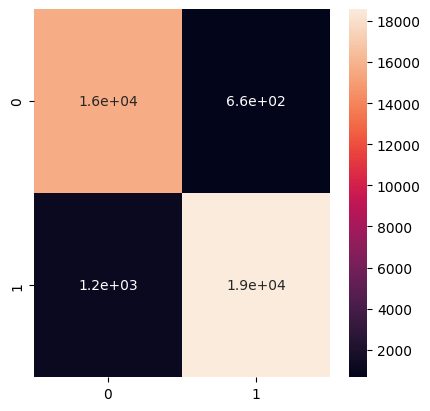

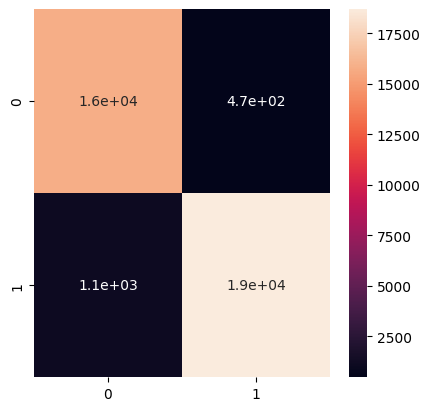

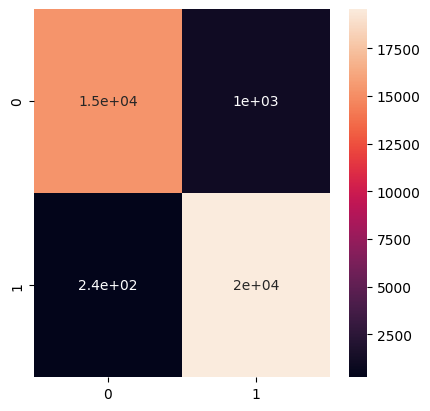

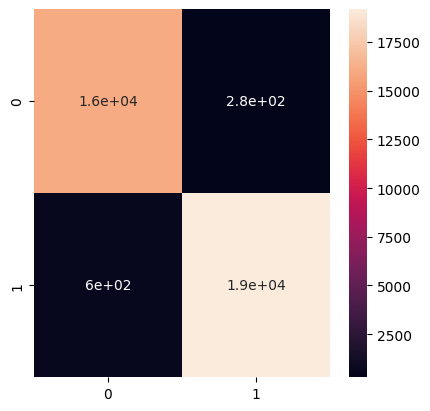

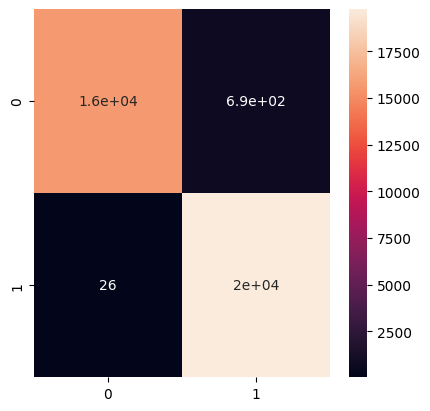

In [27]:
AutoLogger.get_confusion_matrix(a,'validation')

In [26]:
AutoLogger.get_classification_report(a,'validation')

naive bayes
              precision    recall  f1-score   support

           0       0.62      0.82      0.71     16308
           1       0.80      0.59      0.68     19796

    accuracy                           0.69     36104
   macro avg       0.71      0.70      0.69     36104
weighted avg       0.72      0.69      0.69     36104

adaboost
              precision    recall  f1-score   support

           0       0.64      0.89      0.74     16308
           1       0.86      0.59      0.70     19796

    accuracy                           0.72     36104
   macro avg       0.75      0.74      0.72     36104
weighted avg       0.76      0.72      0.72     36104

logistic regression
              precision    recall  f1-score   support

           0       0.72      0.88      0.79     16308
           1       0.88      0.72      0.79     19796

    accuracy                           0.79     36104
   macro avg       0.80      0.80      0.79     36104
weighted avg       0.81      0.79

<Axes: xlabel='validation-accuracy', ylabel='model'>

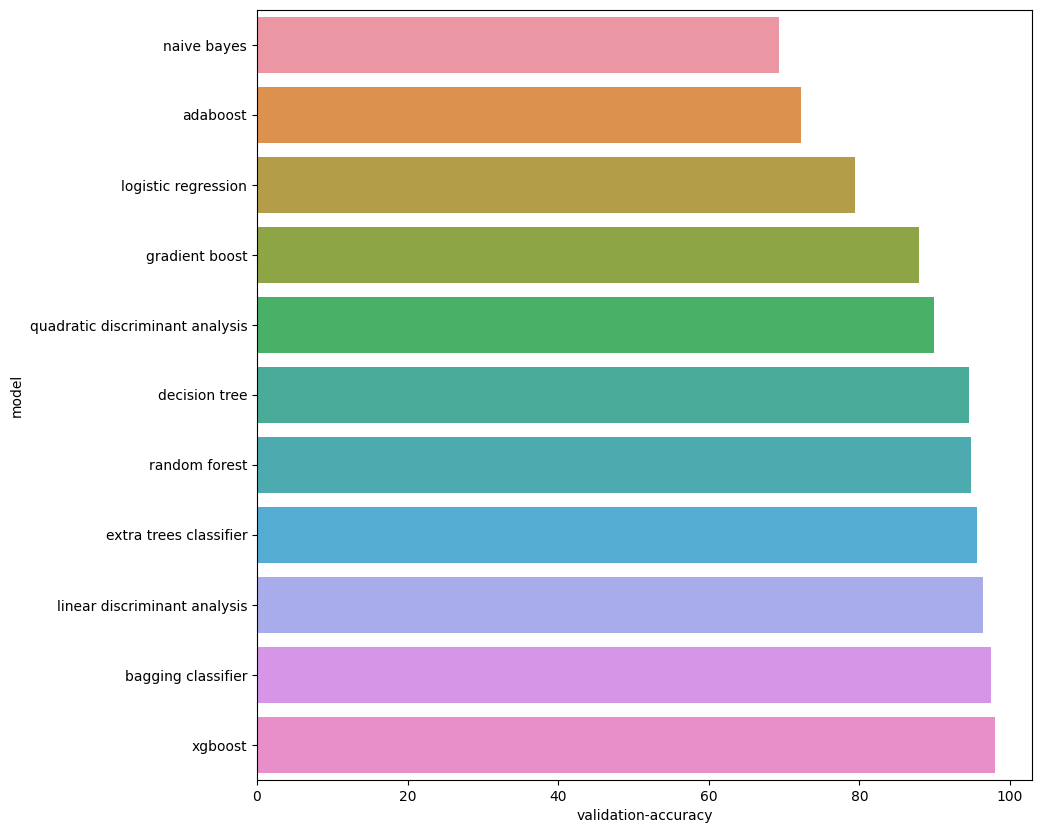

In [28]:
AutoLogger.get_metric_plot_classification(a,'validation','accuracy')

In [21]:
b,mode2=AutoLogger.train_and_log_classification(x_train,y_train2,x_test,y_test2,size='large')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

In [22]:
b

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
0,naive bayes,74.640446,54.074288,87.028392,50.082097,"[[104543, 36623], [0, 3249]]",74.545757,54.063781,86.979683,50.031953,"[[26101, 9190], [0, 813]]",precision recall f1-score ...,precision recall f1-score ...
10,quadratic discriminant analysis,74.782398,54.064699,86.800299,50.127603,"[[104768, 36398], [20, 3229]]",74.667627,54.038908,86.621435,50.050276,"[[26152, 9139], [7, 806]]",precision recall f1-score ...,precision recall f1-score ...
3,adaboost,97.744694,48.875055,49.997166,49.429743,"[[141158, 8], [3249, 0]]",97.748172,48.874086,50.000000,49.430632,"[[35291, 0], [813, 0]]",precision recall f1-score ...,precision recall f1-score ...
6,logistic regression,97.750234,48.875117,50.000000,49.431160,"[[141166, 0], [3249, 0]]",97.748172,48.874086,50.000000,49.430632,"[[35291, 0], [813, 0]]",precision recall f1-score ...,precision recall f1-score ...
9,linear discriminant analysis,97.750234,48.875117,50.000000,49.431160,"[[141166, 0], [3249, 0]]",97.748172,48.874086,50.000000,49.430632,"[[35291, 0], [813, 0]]",precision recall f1-score ...,precision recall f1-score ...
4,gradient boost,97.768930,98.884256,50.415512,50.260009,"[[141166, 0], [3222, 27]]",97.753712,98.876794,50.123001,49.677416,"[[35291, 0], [811, 2]]",precision recall f1-score ...,precision recall f1-score ...
5,xgboost,98.588789,99.288428,68.636504,76.794130,"[[141166, 0], [2038, 1211]]",98.113782,97.630210,58.358416,63.792863,"[[35287, 4], [677, 136]]",precision recall f1-score ...,precision recall f1-score ...
2,random forest,100.000000,100.000000,100.000000,100.000000,"[[141166, 0], [0, 3249]]",98.523709,99.256085,67.220172,75.242821,"[[35291, 0], [533, 280]]",precision recall f1-score ...,precision recall f1-score ...
1,decision tree,100.000000,100.000000,100.000000,100.000000,"[[141166, 0], [0, 3249]]",98.847773,86.606945,87.574101,87.083856,"[[35072, 219], [197, 616]]",precision recall f1-score ...,precision recall f1-score ...
7,bagging classifier,99.883669,99.940566,97.414589,98.643251,"[[141166, 0], [168, 3081]]",98.861622,99.302008,74.783331,82.824742,"[[35290, 1], [410, 403]]",precision recall f1-score ...,precision recall f1-score ...


In [23]:
mode2

ExtraTreesClassifier()

naive bayes
adaboost
logistic regression
gradient boost
quadratic discriminant analysis
decision tree
random forest
extra trees classifier
linear discriminant analysis
bagging classifier
xgboost


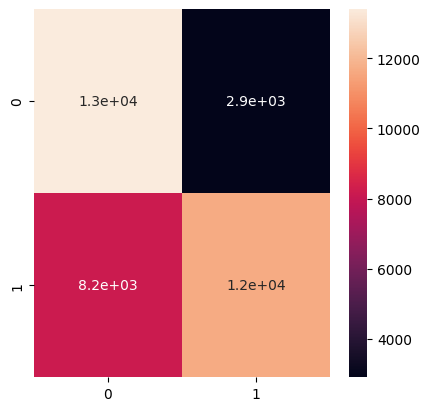

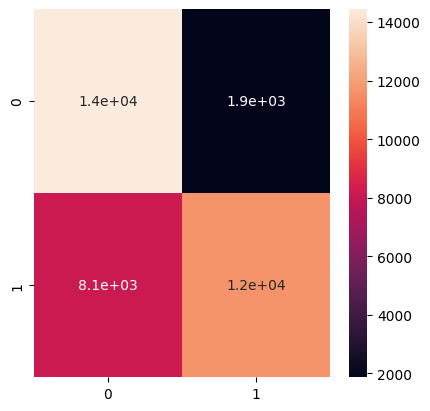

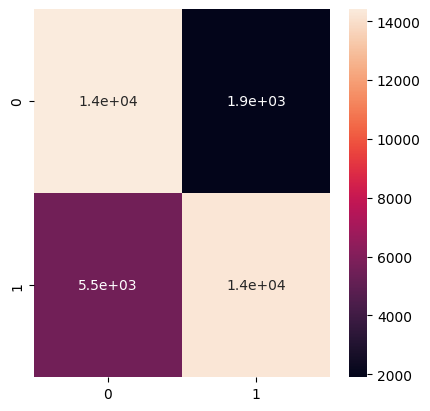

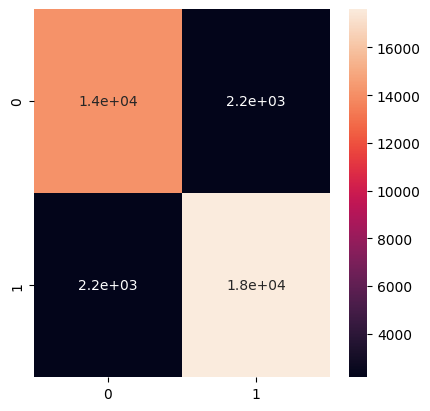

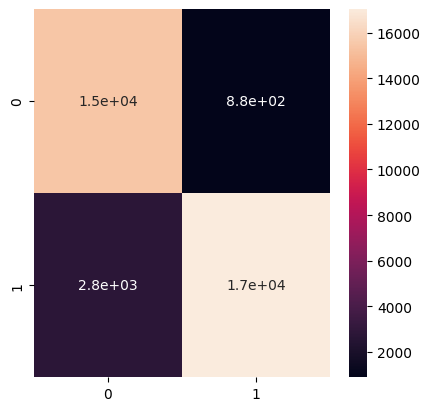

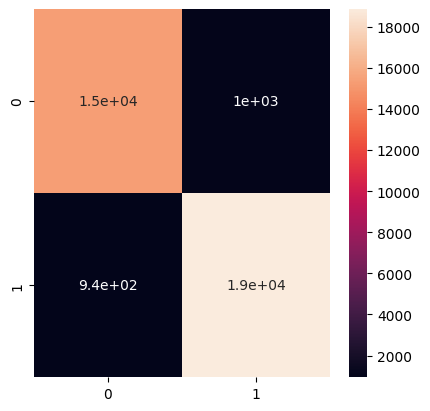

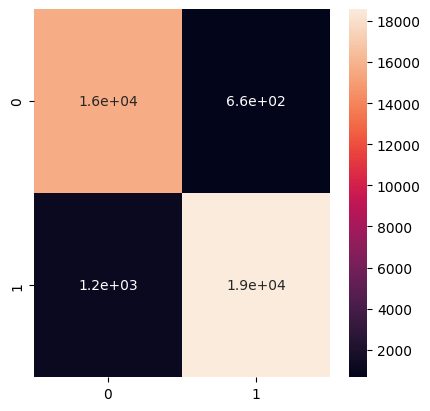

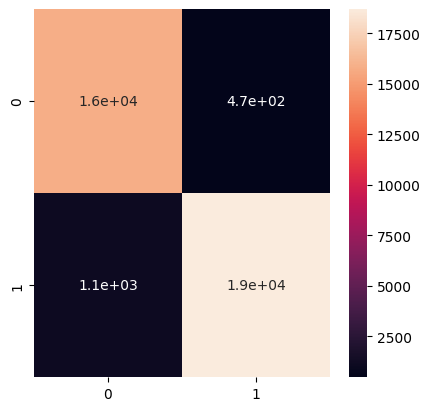

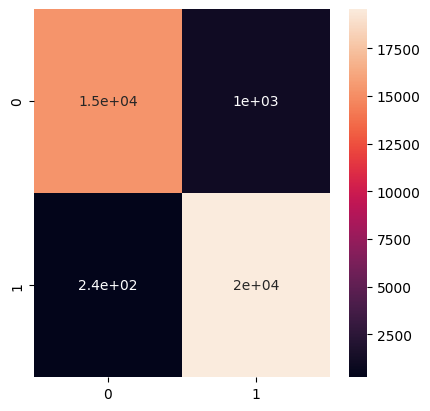

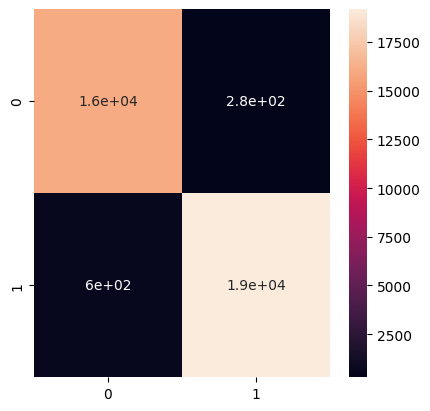

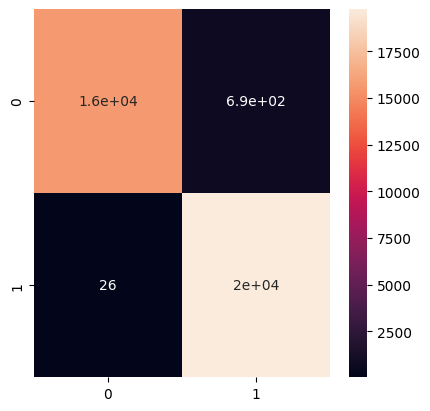

In [29]:
AutoLogger.get_confusion_matrix(a,'validation')

In [30]:
AutoLogger.get_classification_report(a,'validation')

naive bayes
              precision    recall  f1-score   support

           0       0.62      0.82      0.71     16308
           1       0.80      0.59      0.68     19796

    accuracy                           0.69     36104
   macro avg       0.71      0.70      0.69     36104
weighted avg       0.72      0.69      0.69     36104

adaboost
              precision    recall  f1-score   support

           0       0.64      0.89      0.74     16308
           1       0.86      0.59      0.70     19796

    accuracy                           0.72     36104
   macro avg       0.75      0.74      0.72     36104
weighted avg       0.76      0.72      0.72     36104

logistic regression
              precision    recall  f1-score   support

           0       0.72      0.88      0.79     16308
           1       0.88      0.72      0.79     19796

    accuracy                           0.79     36104
   macro avg       0.80      0.80      0.79     36104
weighted avg       0.81      0.79

<Axes: xlabel='validation-accuracy', ylabel='model'>

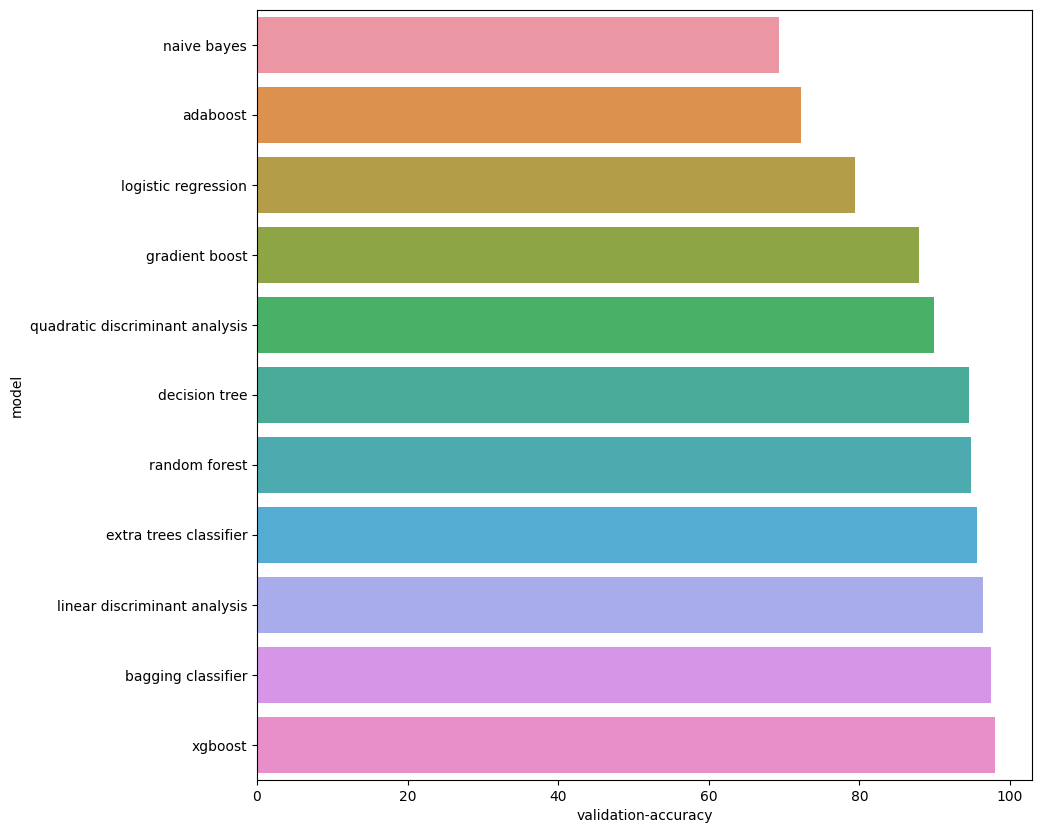

In [31]:
AutoLogger.get_metric_plot_classification(a,'validation','accuracy')